# Лабораторная работа 4

In [79]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import random
import cv2
path_to_csv = "../Laba2/dataset_csv_first.csv"

## Пункт 1-5
 С использованием средств библиотеки Pandas сформировать DataFrame, который будет содержать 2 колонки - название класса и абсолютный путь к файлу.
 Произвести именование колонок сформированного DataFrame в соответствии с рекомендациями, полученными на соответствующей лекции.
 Добавить в DataFrame столбец, который будет содержать числовую метку 0 для первого класса, 1 для второго класса.
 Добавить в DataFrame три столбца, первый из которых содержит информацию о высоте изображения, второй о ширине, а третий о глубине (количество каналов).
 С использованием Pandas вычислить статистическую информацию для столбцов, содержащих информацию о размерах изображения (ширина, высота, глубина) и метках класса. На основе полученной информации определить, является ли собранный вами набор сбалансированным (на основе статистической информации о столбце с метками класса).

Чтение csv файла по колонкам(этап создание dataframe)

In [80]:
def read_csv(name_of_csv, num_of_columns):
    with open(name_of_csv, 'r') as file:
        reader = csv.reader(file, delimiter='\t')
        read_list = []
        for row in reader:
            if num_of_columns == 1:
                share_list = row[0].split(';')
                read_list.append(share_list[0])
            else:
                share_list = row[0].split(';')
                read_list.append(share_list[2])
    return read_list

In [81]:
read_csv(path_to_csv,1)

['Absolute way',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0001.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0002.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0003.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0004.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0005.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0006.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0007.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0008.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0009.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0010.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0011.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0012.jpg',
 '/Users/margogusarova/PycharmProjects/python2.1/dataset/tiger/0013.jpg',
 '/Users/margogusarov

Создание dataframe из csv файла
Данные импортируются с csv файла в виде списка

In [82]:
def create_dataframe(path_of_csv):
    list_abs_way = read_csv(path_of_csv, 1)
    list_name_class = read_csv(path_of_csv, 3)
    list_mark = ["Num_class"]
    list_image_width = ["Image_width"]
    list_image_height = ["Image_hight"]
    list_image_depth = ["Number_of_chanel"]
    list_image_pix = ["Number_of_pixels"]
    for row in list_name_class:
        if row == "tiger":
            list_mark.append("0")
        if row == "leopard":
            list_mark.append("1")

    for row in list_abs_way:
        if row == "Absolute way":
            continue
        else:
            image = plt.imread(row)
            list_image_width.append(image.shape[0])
            list_image_height.append(image.shape[1])
            list_image_depth.append(image.shape[2])
            list_image_pix.append(image.size)

    for i in range(1, len(list_abs_way)):
        try:
            list_abs_way[i] = os.path.abspath(list_abs_way[i])
        except:
            pass

    data = {
        list_abs_way[0]: list_abs_way[1:],
        list_name_class[0]: list_name_class[1:],
        list_mark[0]: list_mark[1:],
        list_image_width[0]: list_image_width[1:],
        list_image_height[0]: list_image_height[1:],
        list_image_depth[0]: list_image_depth[1:],
        list_image_pix[0]: list_image_pix[1:]
    }
    df = pd.DataFrame(data)
    return df

In [83]:
create_dataframe(path_to_csv)

,Absolute way,Class,Num_class,Image_width,Image_hight,Number_of_chanel,Number_of_pixels
0,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,319,480,3,459360
1,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,320,480,3,460800
2,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,300,480,3,432000
3,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,270,480,3,388800
4,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,300,480,3,432000
...,...,...,...,...,...,...,...
1993,/Users/margogusarova/PycharmProjects/python2.1...,leopard,1,320,427,3,409920
1994,/Users/margogusarova/PycharmProjects/python2.1...,leopard,1,240,480,3,345600
1995,/Users/margogusarova/PycharmProjects/python2.1...,leopard,1,319,480,3,459360
1996,/Users/margogusarova/PycharmProjects/python2.1...,leopard,1,200,400,3,240000


## Пункт 6
Написать функцию, которая на вход принимает DataFrame и метку класса, а возвращает отфильтрованный по метке DataFrame. Условие фильтрации - в новый DataFrame включаются те строки, для которых значение метки соответсвует заданному.

Фильтрация по метке класса

In [84]:
def filter_dataframe_mark_class(df: pd.DataFrame, column: str, value: int):
    df = df[df[column] == value]
    # save dataframe to csv file
    df.to_csv("filter_dataframe_mark_class.csv", sep='\t', encoding='utf-8')
    return df

In [93]:
filter_dataframe_mark_class(create_dataframe(path_to_csv), "Num_class", "0")

,Absolute way,Class,Num_class,Image_width,Image_hight,Number_of_chanel,Number_of_pixels
0,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,319,480,3,459360
1,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,320,480,3,460800
2,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,300,480,3,432000
3,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,270,480,3,388800
4,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,300,480,3,432000
...,...,...,...,...,...,...,...
995,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,300,480,3,432000
996,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000
997,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000
998,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000


## Пункт 7
Написать функцию, которая на вход принимает метку класса, максимальное значение ширины и максимальное значение высоты изображения, а возвращает отфильтрованный по заданным параметрам DataFrame. Условие фильтрации - в новый DataFrame включаются те строки, для которых размеры удовлетворяют следующему условию: height  ≤  max_height and width  ≤  max_width, а метка класса соответствует указанной.

Фильтрация по ширине, высоте и метке класса
На вход принимает df, название колонок, max ширину, max высоту и метку класса

In [86]:
def filter_dataframe_wight_and_height_and_mark(df: pd.DataFrame, column1: str, column2: str, column3: str, value1: int, value2: int, value3: int):
    df = df[(df[column1] <= value1) & (df[column2] <= value2) & (df[column3] == value3)]
    print(df)
    # save dataframe to csv file
    df.to_csv("filter_dataframe_wight_and_height.csv", sep='\t', encoding='utf-8')
    return df

In [94]:
filter_dataframe_wight_and_height_and_mark(create_dataframe(path_to_csv), "Image_width", "Image_hight", "Num_class", 400, 400, "0")

                                          Absolute way  Class Num_class  \
30   /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   
31   /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   
32   /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   
33   /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   
34   /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   
..                                                 ...    ...       ...   
977  /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   
989  /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   
996  /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   
997  /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   
998  /Users/margogusarova/PycharmProjects/python2.1...  tiger         0   

     Image_width  Image_hight  Number_of_chanel  Number_of_pixels  
30           200          400  

,Absolute way,Class,Num_class,Image_width,Image_hight,Number_of_chanel,Number_of_pixels
30,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000
31,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000
32,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000
33,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000
34,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000
...,...,...,...,...,...,...,...
977,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,320,400,3,384000
989,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,320,213,3,204480
996,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000
997,/Users/margogusarova/PycharmProjects/python2.1...,tiger,0,200,400,3,240000


## Пункт 8
Выполнить группировку DataFrame по метке класса с вычислением максимального, минимального и среднего значения по количеству пикселей (необходимо будет добавить новый столбец, значение для которого вычисляется по уже заполненным столбцам. О подсчете количества пикселей говорилось на лекции OpenCV).

Группировка по количеству пикселей

In [88]:
def group_dataframe_pixel(df: pd.DataFrame):
    # copy dataframe
    df1 = df.copy()
    # rename column
    df1.rename(columns={'Number_of_pixels': 'Min_pixel'}, inplace=True)
    # copy column
    df1['Max_pixel'] = df1['Min_pixel']
    df1['Mean_pixel'] = df1['Min_pixel']

    # group dataframe by column
    df1 = df1.groupby(['Class']).agg({'Min_pixel': 'min', 'Max_pixel': 'max', 'Mean_pixel': 'mean'})
    return df1

In [95]:
group_dataframe_pixel(create_dataframe(path_to_csv))

,Min_pixel,Max_pixel,Mean_pixel
Class,,,
leopard,192000,460800,367288.496994
tiger,204480,460800,372291.360000


## Пункт 9-10
Написать функцию, которая с использованием средств библиотеки OpenCV строит гистограмму. На вход функция принимает DataFrame и метку класса, на выходе - три массива (каждый массив соответствует значениям гистограммы по каждому каналу). Выбор изображения из DataFrame, для которого будет строиться гистограмма, сделать случайным.
С использованием средств библиотеки matplotlib выполнить отрисовку гистограмм, которые возвращаются из функции пункта 9. Графики и оси должны иметь соответствующие подписи.

Создание гистограммы по метке класса и ее вывод

In [90]:
def create_histogram(df: pd.DataFrame, mark_class: int):
    result = [[], [], []]
    path_image_list = filter_dataframe_mark_class(df, "Num_class", mark_class)
    i = random.randint(0, len(path_image_list))
    path_way = path_image_list.iloc[i, 0]
    # create histogram for image
    img = cv2.imread(path_way)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])

    plt.ylabel('Number of pixels')
    plt.xlabel('Pixel value')
    plt.title('Histogram')
    plt.show()


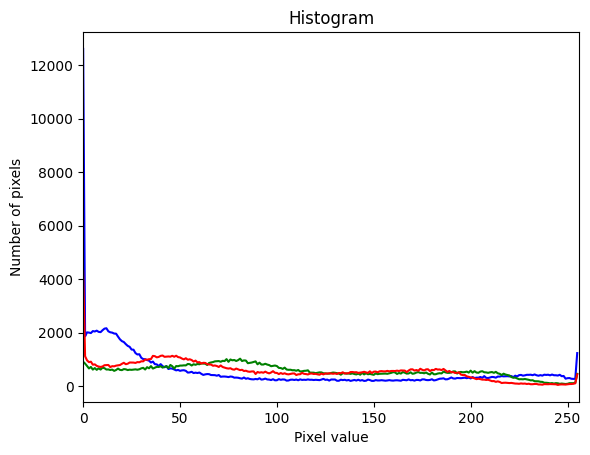

In [91]:
create_histogram(create_dataframe(path_to_csv), "0")

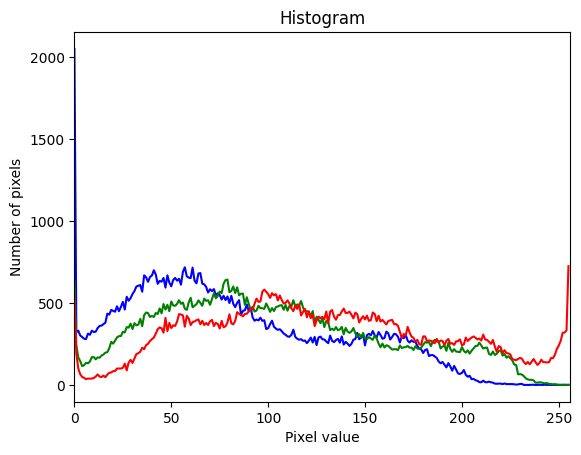

In [92]:
create_histogram(create_dataframe(path_to_csv), "1")